In [ ]:
'''
regression
Question-23
Use 
sklearn.datasets.load_breast_cancer
And Yellowbrick
Show confusion matrix and ROCAUC 
using Logistic regression 


#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
#check wdbc.data or check  breast_cancer.csv , but use load_breast_cancer() 
#Diagnosis (M = malignant,1, B = benign,0) 
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

B. Use data/breast_cancer.csv
Use LabelEncoder and MinMaxScalar and Use pipeline 
Then GridSearch on param_grid = dict(lr__C=[0.1, 1, 10])
using Logistic regression
'''

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ROCAUC
import matplotlib.pyplot as plt

In [2]:
# Load data
X, y = load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
scaler

StandardScaler()

In [3]:
X = scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [4]:
X.shape, y.shape

((569, 30), (569,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# Logistic Regression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predictions and Confusion Matrix
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.965034965034965
Confusion Matrix:
[[50  3]
 [ 2 88]]


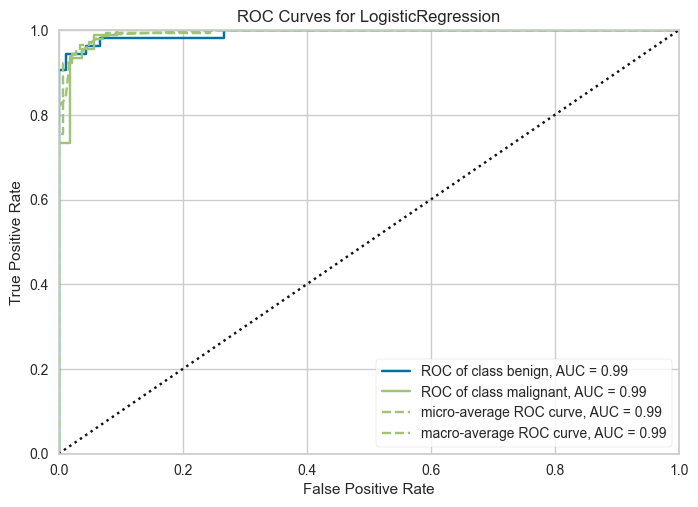

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [8]:
# ROCAUC Visualization
visualizer = ROCAUC(model, classes=['benign', 'malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Part B: Using `breast_cancer.csv`
Use LabelEncoder, MinMaxScaler, Pipeline, and GridSearchCV for Logistic Regression

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
# Read CSV
df = pd.read_csv('breast_cancer.csv')

In [13]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [14]:
X = df.iloc[:, 2:]
y_raw = df.iloc[:, 1]
lenc = LabelEncoder()
y = lenc.fit_transform(y_raw)

In [15]:
X.shape, y.shape

((568, 30), (568,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression())
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LogisticRegression())])

In [17]:
param_grid = dict(lr__C=[0.1, 1, 10])
param_grid

{'lr__C': [0.1, 1, 10]}

In [18]:
gs = GridSearchCV(pipe, param_grid, cv=5)
gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 1, 10]})

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 1, 10]})

In [20]:
print('Best Params:', gs.best_params_)
print('Train Accuracy:', gs.score(X_train, y_train))
print('Test Accuracy:', gs.score(X_test, y_test))
y_pred = gs.predict(X_test)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Best Params: {'lr__C': 10}
Train Accuracy: 0.9835680751173709
Test Accuracy: 0.971830985915493
Confusion Matrix: [[91  1]
 [ 3 47]]
